In [1]:
%autosave 30
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
path = 'C:/Users/Payal/Data Glacier Project/Cross Selling/Cross Selling/Test.csv'
test = pd.read_csv(path)
test.describe

Autosaving every 30 seconds


<bound method NDFrame.describe of         fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0       2016-06-28     15889            F              ES    V   56   
1       2016-06-28   1170544            N              ES    H   36   
2       2016-06-28   1170545            N              ES    V   22   
3       2016-06-28   1170547            N              ES    H   22   
4       2016-06-28   1170548            N              ES    H   22   
...            ...       ...          ...             ...  ...  ...   
929610  2016-06-28    660237            N              ES    V   55   
929611  2016-06-28    660238            N              ES    V   30   
929612  2016-06-28    660240            N              ES    V   52   
929613  2016-06-28    660243            N              ES    V   32   
929614  2016-06-28    660248            N              ES    V   92   

        fecha_alta  ind_nuevo  antiguedad  indrel  ... indext  conyuemp  \
0       1995-01-16          0         

In [2]:
path = 'C:/Users/Payal/Data Glacier Project/Cross Selling/Cross Selling/Train.csv'
train = pd.read_csv(path)
train.describe

<bound method NDFrame.describe of           fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0         2015-01-28   1375586            N              ES    H   35   
1         2015-01-28   1050611            N              ES    V   23   
2         2015-01-28   1050612            N              ES    V   23   
3         2015-01-28   1050613            N              ES    H   22   
4         2015-01-28   1050614            N              ES    V   23   
...              ...       ...          ...             ...  ...  ...   
13647304  2016-05-28   1166765            N              ES    V   22   
13647305  2016-05-28   1166764            N              ES    V   23   
13647306  2016-05-28   1166763            N              ES    H   47   
13647307  2016-05-28   1166789            N              ES    H   22   
13647308  2016-05-28   1550586            N              ES    H   37   

          fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0         201

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             929615 non-null  object 
 1   ncodpers               929615 non-null  int64  
 2   ind_empleado           929615 non-null  object 
 3   pais_residencia        929615 non-null  object 
 4   sexo                   929610 non-null  object 
 5   age                    929615 non-null  int64  
 6   fecha_alta             929615 non-null  object 
 7   ind_nuevo              929615 non-null  int64  
 8   antiguedad             929615 non-null  int64  
 9   indrel                 929615 non-null  int64  
 10  ult_fec_cli_1t         1683 non-null    object 
 11  indrel_1mes            929592 non-null  float64
 12  tiprel_1mes            929592 non-null  object 
 13  indresi                929615 non-null  object 
 14  indext                 929615 non-nu

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [5]:
import os

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.impute import SimpleImputer

In [7]:
test.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                         0
segmento                   2248
dtype: int64

In [8]:
train.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

Changing Datatypes

In [9]:
train['age'] = pd.to_numeric(train['age'], errors='coerce')
train.antiguedad = pd.to_numeric(train.antiguedad, errors = 'coerce')
train.indrel_1mes = pd.to_numeric(train.indrel_1mes, errors = 'coerce')

In [10]:
train["fecha_dato"] = pd.to_datetime(train["fecha_dato"],format="%Y-%m-%d")
train["fecha_alta"] = pd.to_datetime(train["fecha_alta"],format="%Y-%m-%d")

<AxesSubplot:>

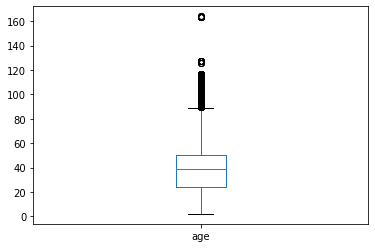

In [11]:
train['age'].plot.box()

In [12]:
train.age.quantile(0.975)

81.0

In [13]:
train.age.quantile(0.025)

20.0

Drop outlier ages(<18 and >81)


In [14]:
index_names = train[(train['age']  >=81) | (train['age']  <=18)].index

train.drop(index_names, inplace = True)

Replace NA values for Renta with mean


In [15]:
imputer = SimpleImputer(missing_values= np.nan,strategy= 'mean')
imputer = imputer.fit(train[['renta']])
train['renta']= imputer.transform(train[['renta']])

Replace NA values for ind_actividad_cliente with the median

In [16]:
train.loc[train.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
train["ind_actividad_cliente"].median()

Drop empty columns

In [17]:
train = train.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [18]:
train.nomprov.unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', nan,
       'ALMERIA', 'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA',
       'HUELVA', 'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE',
       'MELILLA', 'TARRAGONA', 'ALAVA', 'CEUTA'], dtype=object)

Fix Unicode character


In [19]:
train.loc[train.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

tipodom doesn't seem to be useful, and the province code is not needed because the name of the province exists in nomprov

In [20]:
train.drop(["tipodom","cod_prov"],axis=1,inplace=True)

Replace NA values with "UNKNOWN"

In [21]:
train.loc[train.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [22]:
train.loc[train.fecha_alta.isnull(),"fecha_alta"] = "UNKNOWN"

In [23]:
train.loc[train.indrel.isnull(),"indrel"] = "UNKNOWN"

In [24]:
 train.loc[train.ind_nuevo.isnull(),"ind_nuevo"] = "UNKNOWN"

Replace NA values in ind_nomina_ult1 and ind_nom_pens_ult1 and antiguedad with zero

In [25]:
train.loc[train.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
train.loc[train.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0
train.loc[train.antiguedad.isnull(), 'antiguedad'] = 0
train.loc[train.antiguedad < 0, 'antiguedad'] = 0

NA values in the following are replaced with the mode

In [26]:
train['ind_empleado'].value_counts()

N    13116513
B        3566
F        2523
A        2490
S          17
Name: ind_empleado, dtype: int64

In [27]:
train.loc[train.ind_empleado.isnull(), "ind_empleado"] = "N"

In [28]:
train['segmento'].value_counts()

02 - PARTICULARES     7503606
03 - UNIVERSITARIO    4935579
01 - TOP               530855
Name: segmento, dtype: int64

In [29]:
train.loc[train.segmento.isnull(), "segmento"] = "02 - PARTICULARES"

In [30]:
train['indfall'].value_counts()

N    13107975
S       17134
Name: indfall, dtype: int64

In [31]:
train.loc[train.indfall.isnull(), "indfall"] = "N"

In [32]:
train['tiprel_1mes'].value_counts()

I    7072999
A    5925981
P       4562
R        849
N          1
Name: tiprel_1mes, dtype: int64

In [33]:
train.loc[train.tiprel_1mes.isnull(), "tiprel_1mes"] = "A"

In [34]:
train['indrel_1mes'].value_counts()

1.0    12997711
3.0        4265
2.0        1269
4.0         297
Name: indrel_1mes, dtype: int64

In [35]:
train.loc[train.indrel_1mes.isnull(), "indrel_1mes"] = "1.0"


In [36]:
train['age'].value_counts()

23.0    779884
22.0    736314
24.0    734785
21.0    675988
25.0    472016
         ...  
76.0     48997
80.0     35773
79.0     35065
78.0     34358
19.0     21597
Name: age, Length: 62, dtype: int64

In [37]:
train.loc[train.age.isnull(), "age"] = "23.0"

Replacing the rest with "UNKNOWN"

In [38]:
string_data = train.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]

unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    train.loc[train[col].isnull(),col] = "UNKNOWN"

Remove products that nobody buys

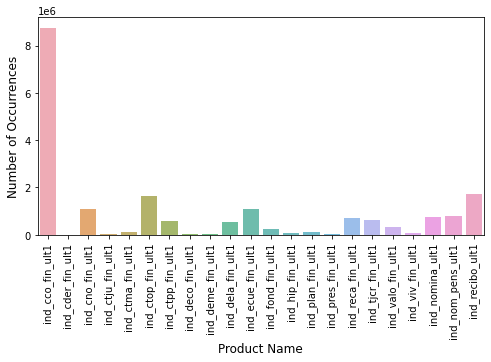

In [39]:
target_counts = train[train.columns[22:49]].sum(axis=0)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
train = train.drop(['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cder_fin_ult1','ind_ctju_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
                    'ind_pres_fin_ult1','ind_viv_fin_ult1'], axis=1)

In [41]:
train.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_cco_fin_ult1         0
ind_cno_fin_ult1         0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
ind_valo_fin_ult1        0
ind_nomina_ult1          0
ind_nom_pens_ult1        0
ind_recibo_ult1          0
dtype: int64

### Data CLeaning Done!

In [42]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install wordcloud

In [44]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 36)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  17
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    36 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
2 numeric variables in data exceeds limit, taking 

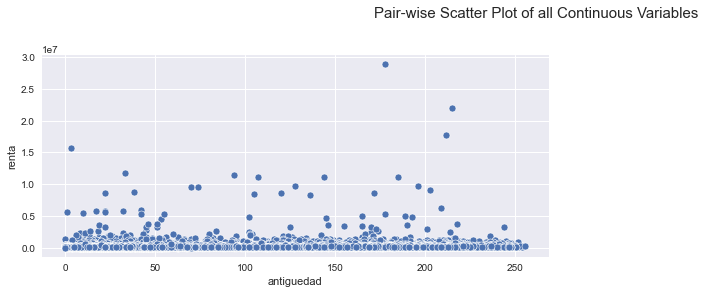

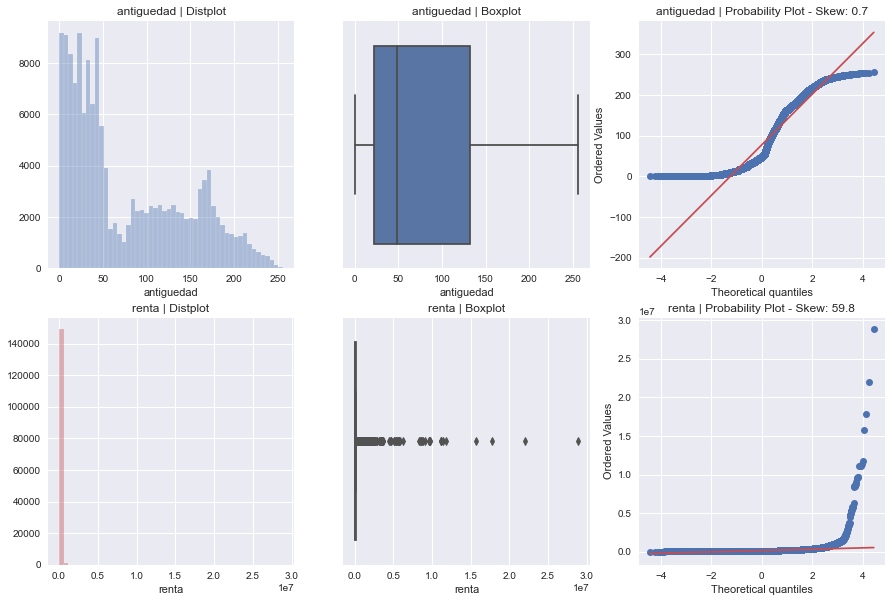

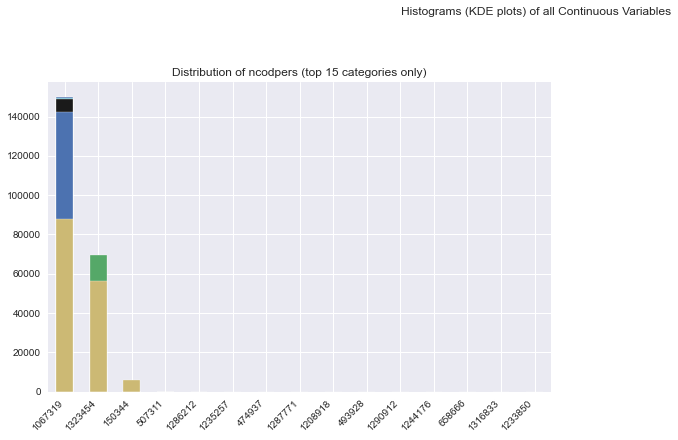

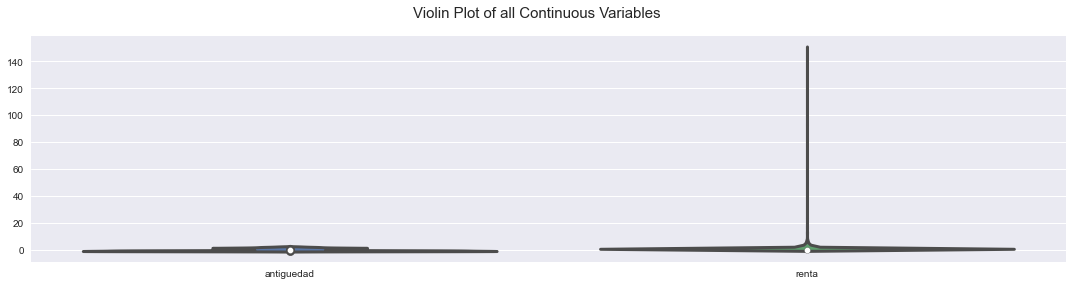

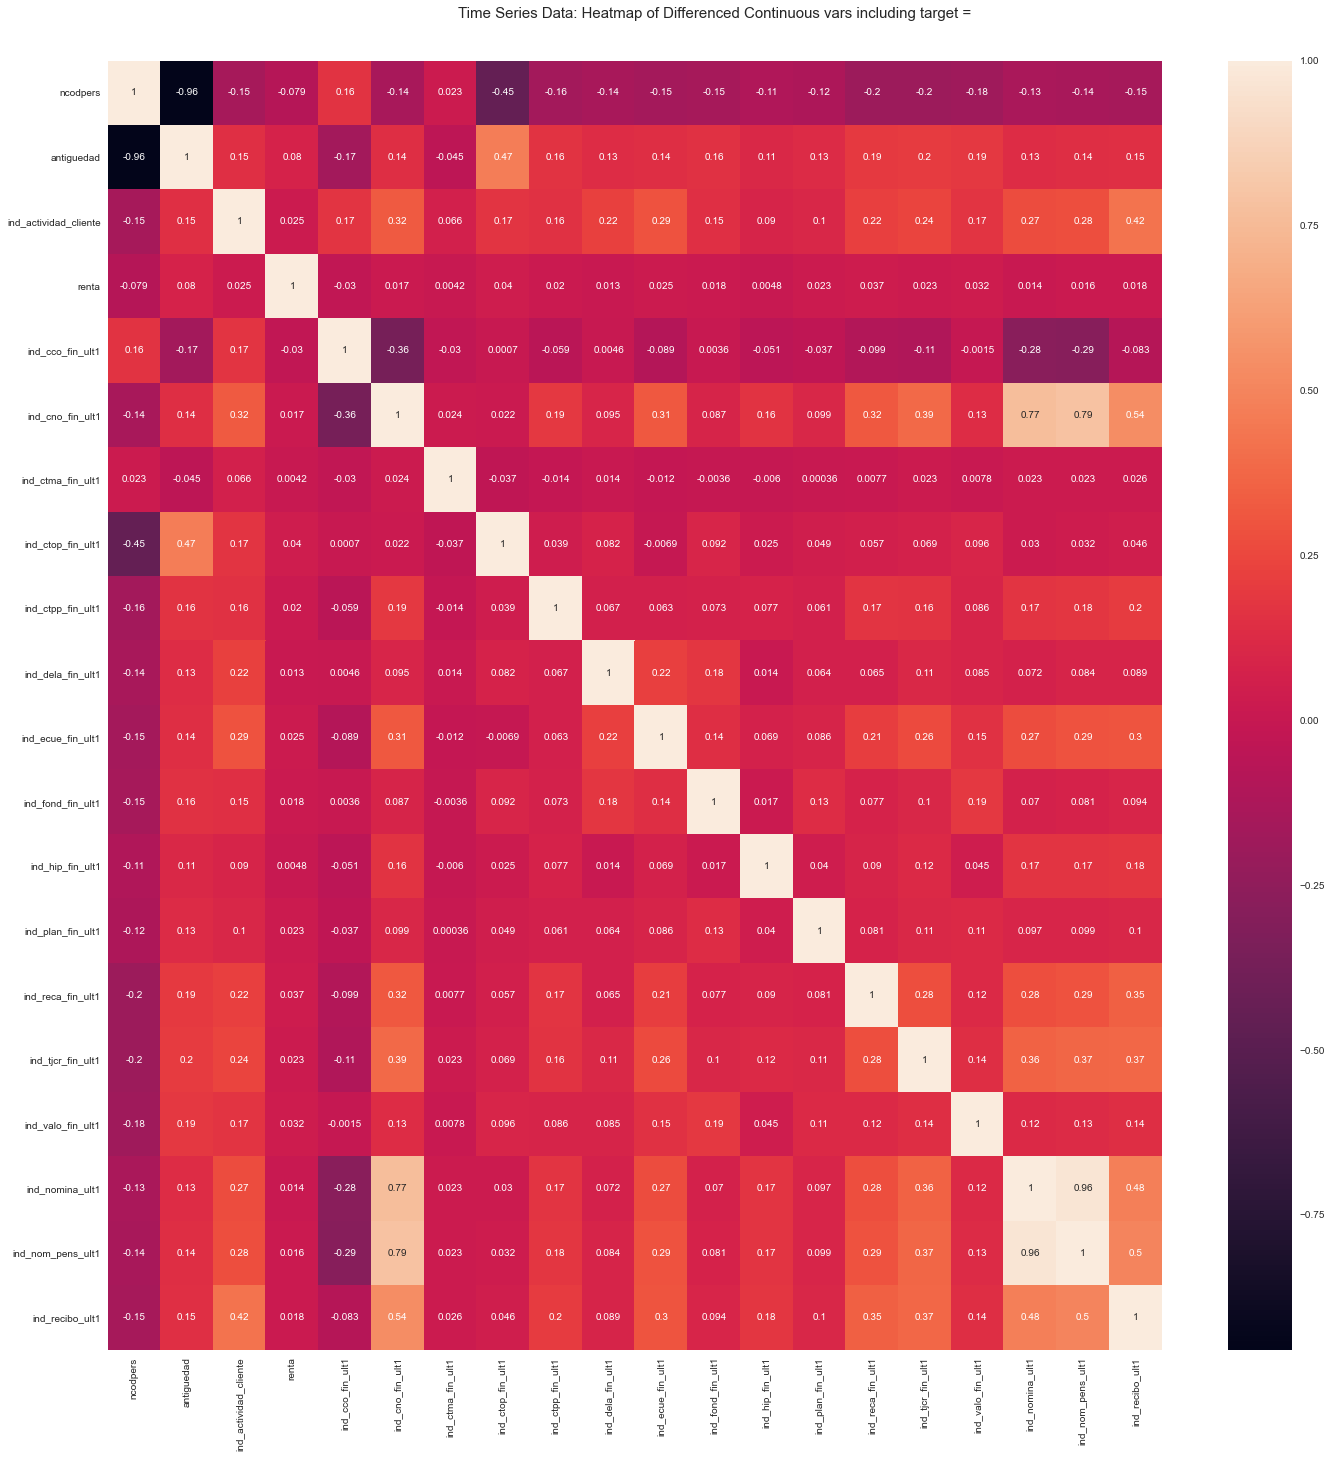

Could not draw Date Vars


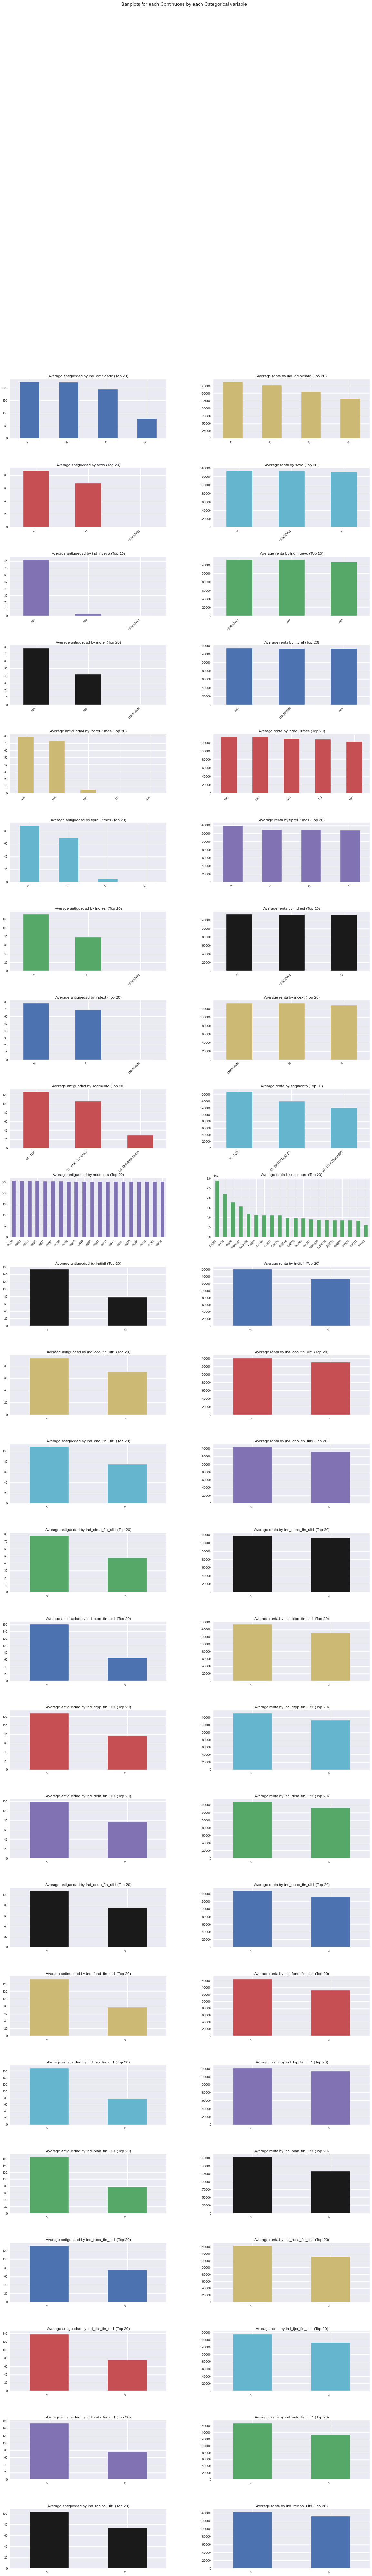

Time to run AutoViz (in seconds) = 6239.618

 ###################### VISUALIZATION Completed ########################


In [45]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=train,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)